# Cleaning

## Merging the data into one single file which has 4 seasons data(2020-2024) 

In [57]:
import pandas as pd

import os

# Define the seasons you want to merge
seasons = ['2020-2021', '2021-2022', '2022-2023', '2023-2024']

# Get the current working directory where the CSV files are located
directory = os.getcwd()

# List to store all dataframes
all_data = []

# Loop through each season and read the corresponding CSV files
for season in seasons:
    for filename in os.listdir(directory):
        if filename.endswith(f'{season}.csv'):  # Check if file matches the season
            file_path = os.path.join(directory, filename)
            team_name = filename.split(season)[0].replace('_', '')  # Extract team name and clean it
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Add the 'Team' and 'Season' columns
            df['Team'] = team_name  # Add team name
            df['Season'] = season  # Add season information
            
            # Reorder columns if you want to make 'Team' the 4th column (optional)
            cols = list(df.columns)
            cols.insert(3, cols.pop(cols.index('Team')))  # Move 'Team' to the 4th position
            df = df[cols]  # Reorder the dataframe
            
            # Append the dataframe to the list
            all_data.append(df)

# Concatenate all dataframes into a single dataframe
final_df = pd.concat(all_data, ignore_index=True)

# Save the final merged dataframe into a single CSV file
final_df.to_csv('all_seasons_merged.csv', index=False)

print("All seasons data merged into 'all_seasons_merged.csv'.")


All seasons data merged into 'all_seasons_merged.csv'.


## Changing names of column for better understanding

In [58]:
import pandas as pd

# Load your merged CSV file
file_path = 'all_seasons_merged.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Create a dictionary with old and new column names
column_rename_dict = {
    'Unnamed: 0': 'Index',
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Nation': 'Nation',
    'Unnamed: 2_level_0_Pos': 'Position',
    'Unnamed: 3_level_0_Age': 'Age',
    'Playing Time_MP': 'Matches Played (MP)',
    'Playing Time_Starts': 'Starts',
    'Playing Time_Min': 'Minutes Played (Min)',
    'Playing Time_90s': '90s Played (90s)',
    'Performance_Gls': 'Goals (Gls)',
    'Performance_Ast': 'Assists (Ast)',
    'Performance_G+A': 'Goals + Assists (G+A)',
    'Performance_G-PK': 'Non-Penalty Goals (G-PK)',
    'Performance_PK': 'Penalty Kicks Made (PK)',
    'Performance_PKatt': 'Penalty Kicks Attempted (PKatt)',
    'Performance_CrdY': 'Yellow Cards (CrdY)',
    'Performance_CrdR': 'Red Cards (CrdR)',
    'Expected_xG': 'Expected Goals (xG)',
    'Expected_npxG': 'Non-Penalty xG (npxG)',
    'Expected_xAG': 'Expected Assisted Goals (xAG)',
    'Expected_npxG+xAG': 'Non-Penalty xG + Assisted Goals (npxG+xAG)',
    'Progression_PrgC': 'Progressive Carries (PrgC)',
    'Progression_PrgP': 'Progressive Passes (PrgP)',
    'Progression_PrgR': 'Progressive Passes Received (PrgR)',
    'Per 90 Minutes_Gls': 'Goals per 90 Minutes (Gls/90)',
    'Per 90 Minutes_Ast': 'Assists per 90 Minutes (Ast/90)',
    'Per 90 Minutes_G+A': 'Goals + Assists per 90 Minutes (G+A/90)',
    'Per 90 Minutes_G-PK': 'Non-Penalty Goals per 90 Minutes (G-PK/90)',
    'Per 90 Minutes_G+A-PK': 'Goals + Assists minus Penalty Kicks per 90 Minutes (G+A-PK/90)',
    'Per 90 Minutes_xG': 'Expected Goals per 90 Minutes (xG/90)',
    'Per 90 Minutes_xAG': 'Expected Assisted Goals per 90 Minutes (xAG/90)',
    'Per 90 Minutes_xG+xAG': 'Expected Goals + Assisted Goals per 90 Minutes (xG+xAG/90)',
    'Per 90 Minutes_npxG': 'Non-Penalty Expected Goals per 90 Minutes (npxG/90)',
    'Per 90 Minutes_npxG+xAG': 'Non-Penalty xG + Assisted Goals per 90 Minutes (npxG+xAG/90)',
    'Unnamed: 33_level_0_Matches': '',  # Leave empty if you don't need this column
    'Unnamed: 4_level_0_MP': 'Matches Played (MP)',
    'Team': 'Team',  # Already correctly named
    'Season': 'Season'  # Already correctly named
}

# Rename the columns using the dictionary
df.rename(columns=column_rename_dict, inplace=True)

# Save the updated dataframe to a new CSV file
df.to_csv('all_seasons_renamed.csv', index=False)

print("Columns renamed and saved to 'all_seasons_renamed.csv'.")


Columns renamed and saved to 'all_seasons_renamed.csv'.


## Removing Players who have not played in a season

In [59]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('all_seasons_renamed.csv')

# Remove players with no minutes played (blank or 0)
# First, drop rows where 'Minutes Played (Min)' is blank (NaN)
df = df.dropna(subset=['Minutes Played (Min)'])

# Now, remove rows where 'Minutes Played (Min)' is 0
df = df[df['Minutes Played (Min)'] > 0]

# After removing these players, print the cleaned DataFrame
print(df.head())

# Optionally save the cleaned data to a new CSV file
df.to_csv('cleaned_dataset_no_minutes.csv', index=False)


   Index          Player  Nation Team Position   Age  Matches Played (MP)  \
0      0      Unai Simón  es ESP   AC       GK  23.0                 37.0   
1      1  Iñigo Martínez  es ESP   AC       DF  29.0                 28.0   
2      2  Iñaki Williams  gh GHA   AC       FW  26.0                 38.0   
3      3  Álex Berenguer  es ESP   AC    MF,FW  25.0                 35.0   
4      4      Ander Capa  es ESP   AC       DF  28.0                 28.0   

   Starts  Minutes Played (Min)  90s Played (90s)  ...  \
0      37                3330.0              37.0  ...   
1      28                2519.0              28.0  ...   
2      27                2387.0              26.5  ...   
3      27                2278.0              25.3  ...   
4      25                2131.0              23.7  ...   

   Non-Penalty Goals per 90 Minutes (G-PK/90)  \
0                                        0.00   
1                                        0.04   
2                                        


## Removing rows where the second column has "Squad Total" or "Opponent Total"


In [60]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('cleaned_dataset_no_minutes.csv')

# Remove rows where the second column has "Squad Total" or "Opponent Total"
df = df[~df['Player'].isin(['Squad Total', 'Opponent Total'])]

# After removing these entries, print the cleaned DataFrame
print(df.head())

# Optionally save the cleaned data to a new CSV file
df.to_csv('cleaned_dataset_no_totals.csv', index=False)


   Index          Player  Nation Team Position   Age  Matches Played (MP)  \
0      0      Unai Simón  es ESP   AC       GK  23.0                 37.0   
1      1  Iñigo Martínez  es ESP   AC       DF  29.0                 28.0   
2      2  Iñaki Williams  gh GHA   AC       FW  26.0                 38.0   
3      3  Álex Berenguer  es ESP   AC    MF,FW  25.0                 35.0   
4      4      Ander Capa  es ESP   AC       DF  28.0                 28.0   

   Starts  Minutes Played (Min)  90s Played (90s)  ...  \
0      37                3330.0              37.0  ...   
1      28                2519.0              28.0  ...   
2      27                2387.0              26.5  ...   
3      27                2278.0              25.3  ...   
4      25                2131.0              23.7  ...   

   Non-Penalty Goals per 90 Minutes (G-PK/90)  \
0                                        0.00   
1                                        0.04   
2                                        

## Dropping the 'Index' column

In [61]:
# Check if 'Index' column exists before dropping it
if 'Index' in df.columns:
    df.drop(columns=['Index'], inplace=True)

# Optionally save the updated dataframe to a new CSV file
df.to_csv('cleaned_dataset_no_index.csv', index=False)

# Visualization

## Plot 1:  Top 10 Players by Goals Over Seasons
#### In this plot, we visualize the performance of the top 10 players based on their goal counts across different seasons. Using a bar plot with hue, we differentiate the players' goal tallies by season, allowing for a clear comparison of their scoring abilities over time. The dataset is filtered to include only the ten players with the highest total goals, showcasing their contributions in each respective season. The use of a distinct color palette enhances the visual appeal and clarity, making it easier to interpret the data at a glance.


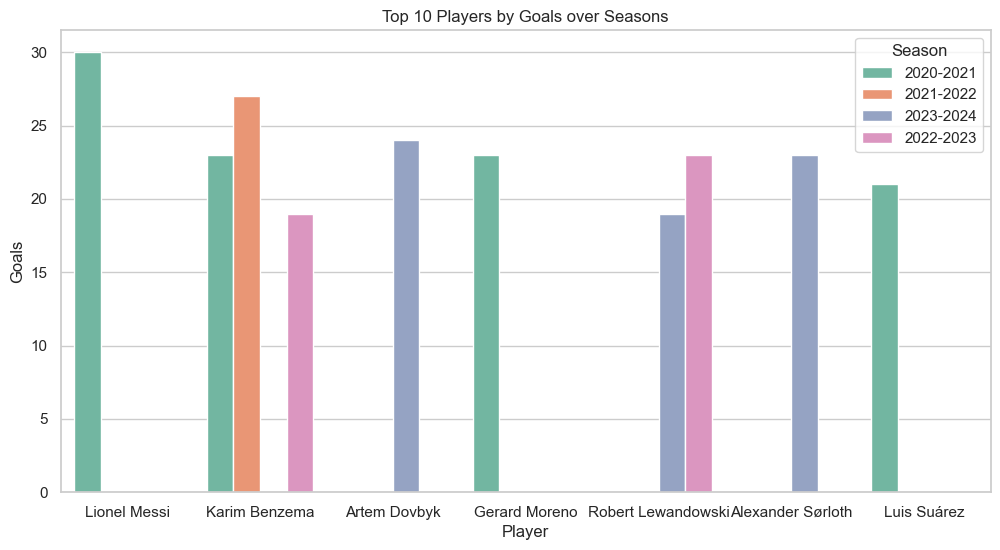

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_dataset_no_index.csv')  # Replace with your actual file path

# Set plot styles
sns.set(style="whitegrid")

top_10_goals = df.nlargest(10, 'Goals (Gls)')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_goals, x='Player', y='Goals (Gls)', hue='Season', palette='Set2')
plt.title('Top 10 Players by Goals over Seasons')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.legend(title='Season')
plt.show()

## Plot 2: **Goals per Season**

#### In this line plot, we analyze the trend of total goals scored across different seasons. Each point represents the aggregate number of goals for that particular season, connected by lines to illustrate the progression over time. The use of markers enhances the visibility of each data point, while the blue color provides a clean and professional look. This visualization allows us to easily identify fluctuations in goal-scoring performance from season to season, helping to highlight any significant increases or decreases in overall scoring.

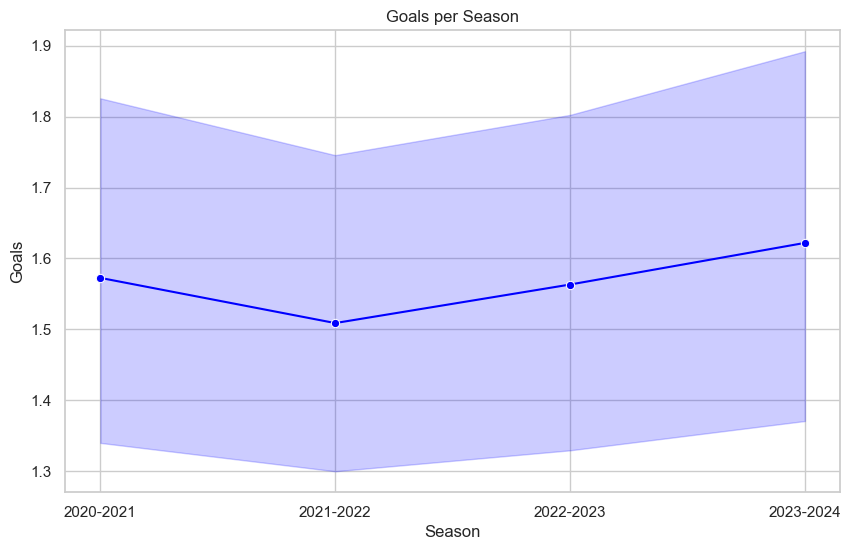

In [63]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Season', y='Goals (Gls)', marker='o', color='blue')
plt.title('Goals per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

## Plot 3: **Top Players by Goals Across Seasons**

#### This line plot showcases the performance of the top five goal-scoring players for each season. By aggregating data on goals, assists, and expected goals, we focus on identifying the key players who have consistently excelled over the seasons. Each player's scoring trend is represented with distinct lines, making it easy to compare their performances visually. The use of different colors for each player highlights individual contributions, allowing us to see how each player has fared relative to their peers over time. This visualization provides insights into the shifting dynamics of player performances and identifies standout players in goal-scoring across multiple seasons.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\725654490.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



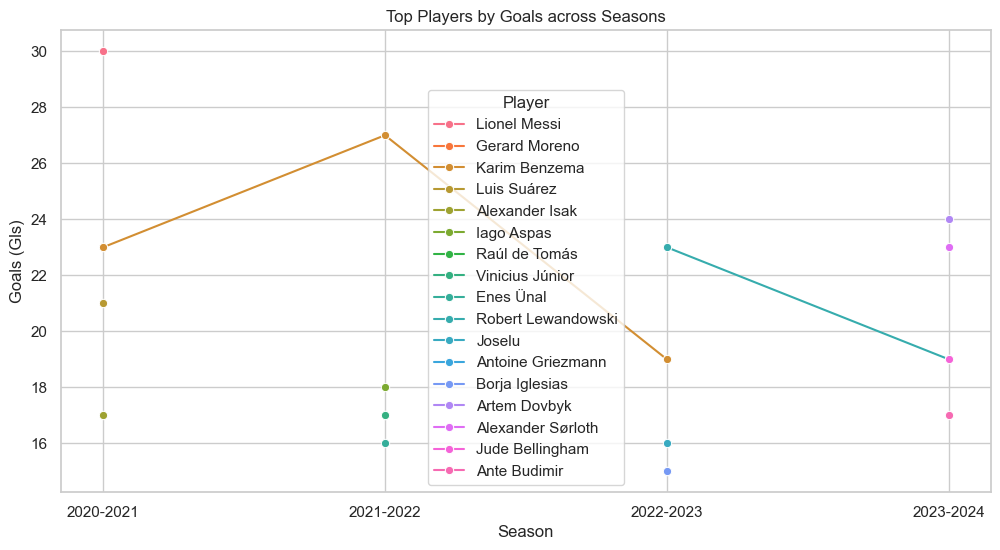

In [64]:
# Identify key players across seasons
top_players_per_season = df.groupby(['Season', 'Player'])[['Goals (Gls)', 'Assists (Ast)', 'Expected Goals (xG)']].sum().reset_index()

# Filter for top performers in each season (e.g., top 5 by goals)
top_players_per_season = top_players_per_season.groupby('Season').apply(lambda x: x.nlargest(5, 'Goals (Gls)')).reset_index(drop=True)

# Line plot showing top players across seasons
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='Goals (Gls)', hue='Player', data=top_players_per_season, marker='o')
plt.title('Top Players by Goals across Seasons')
plt.show()

## Plot 4: **Minutes Played vs. Goals Scored**

#### In this scatter plot, we explore the relationship between the number of minutes played and the total goals scored by players. Each point on the plot represents an individual player, with the x-axis indicating the total minutes they have spent on the field, while the y-axis shows their corresponding goal tally. This visualization allows us to assess whether there is a correlation between the time a player spends in matches and their scoring output. By examining the distribution of points, we can identify patterns, such as whether players who play more minutes tend to score more goals or if there are outliers who achieve high goal counts despite fewer minutes played. This analysis helps in understanding player efficiency and effectiveness in converting playtime into scoring opportunities.

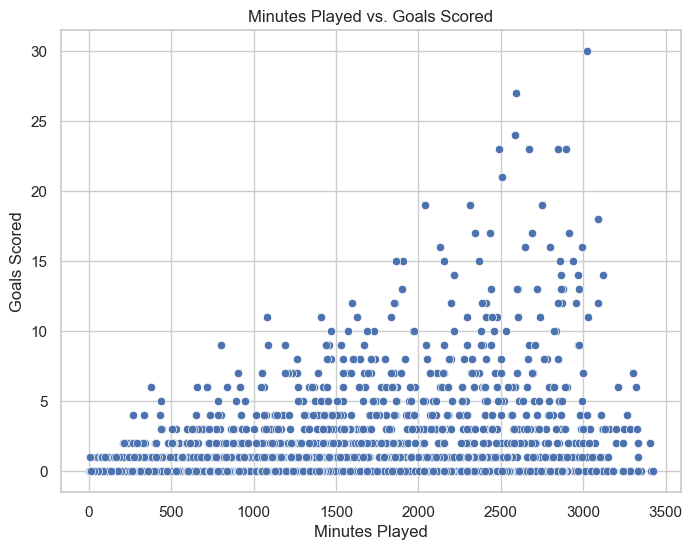

In [65]:
# 4. Scatter Plot - Minutes Played vs. Goals Scored
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Minutes Played (Min)', y='Goals (Gls)', data=df)
plt.title('Minutes Played vs. Goals Scored')
plt.xlabel('Minutes Played')
plt.ylabel('Goals Scored')
plt.show()

## Plot 5: **Goals and Assists per 90 Minutes by Season**

#### This facet grid visualization presents a detailed comparison of goals and assists per 90 minutes for players across different seasons. Each subplot corresponds to a specific season, displaying the relationship between goals scored and assists made per 90 minutes of playtime. The scatter points represent individual player performances, with alpha transparency applied to improve visibility when points overlap. This multi-panel approach allows for easy comparison of trends over the seasons, highlighting how player contributions in terms of goals and assists evolve over time. By examining these plots, we can identify which players consistently perform well in both scoring and assisting roles, as well as any shifts in overall performance metrics across seasons.

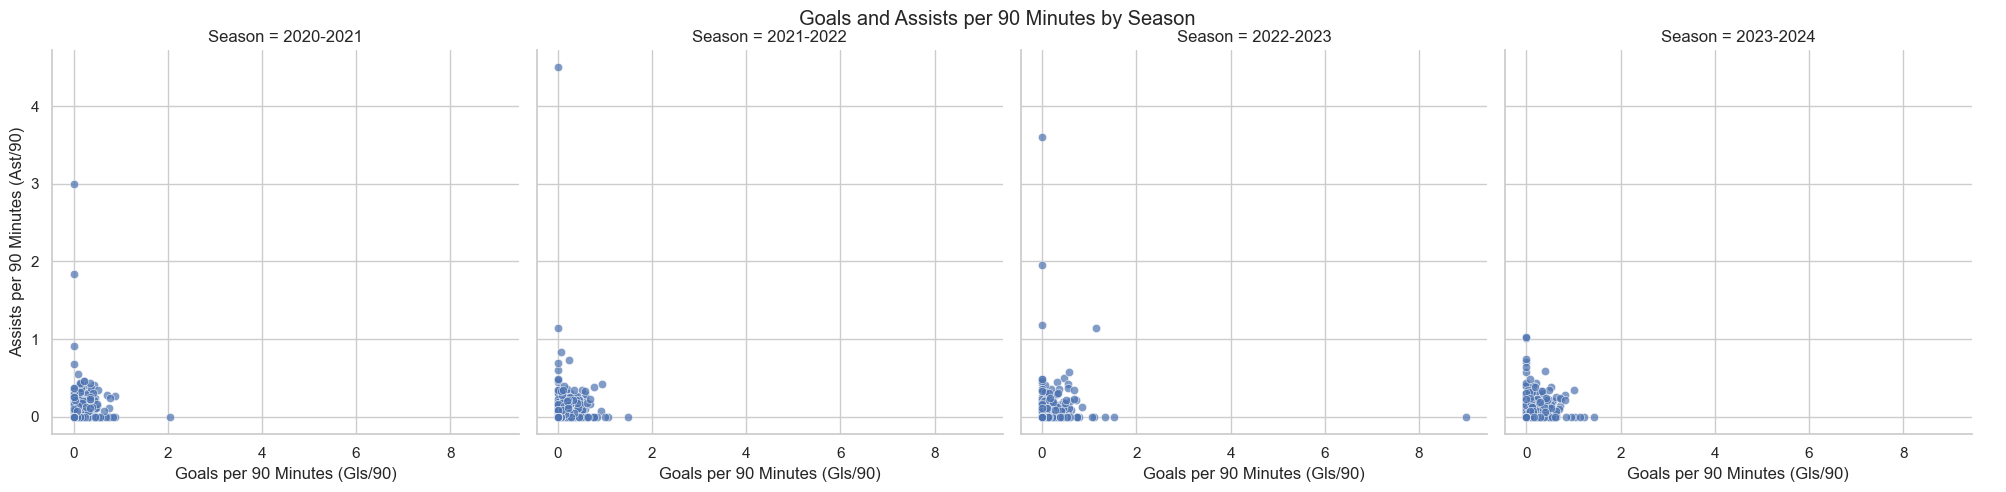

In [66]:

g = sns.FacetGrid(df, col='Season', height=5, aspect=1)
g.map(sns.scatterplot, 'Goals per 90 Minutes (Gls/90)', 'Assists per 90 Minutes (Ast/90)', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Goals and Assists per 90 Minutes by Season')
plt.show()


## Plot 6: **Distribution of Goals per 90 Minutes by Position**

#### This violin plot illustrates the distribution of goals scored per 90 minutes across different player positions. The width of each "violin" represents the density of players achieving various goal rates, providing a comprehensive view of how scoring efficiency varies by position. The y-axis reflects the goals scored per 90 minutes, while the x-axis categorizes players based on their positions on the field. This visualization enables us to observe patterns, such as which positions tend to score more frequently and how scoring distributions differ among roles. Additionally, the plot highlights the variability within each position, allowing for comparisons between attacking, midfield, and defensive players in terms of their scoring contributions. This analysis is valuable for understanding positional strengths in goal-scoring efficiency.

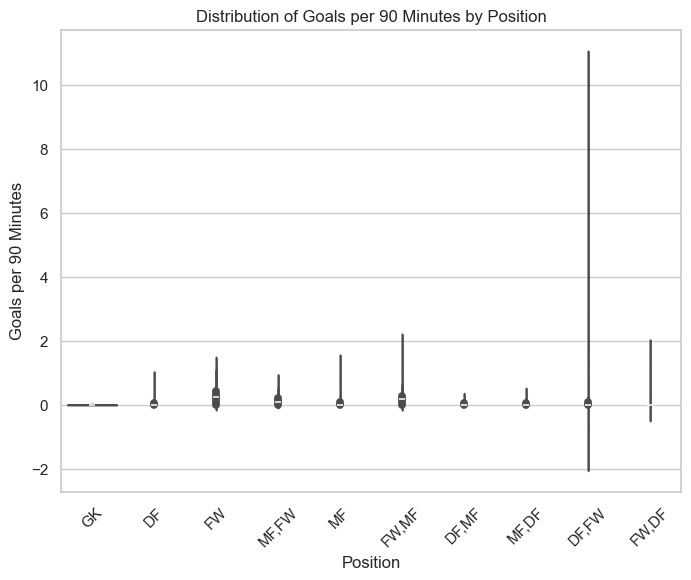

In [67]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Position', y='Goals per 90 Minutes (Gls/90)', data=df)
plt.title('Distribution of Goals per 90 Minutes by Position')
plt.xlabel('Position')
plt.ylabel('Goals per 90 Minutes')
plt.xticks(rotation=45)
plt.show()

## Plot 7: Proportion of Red and Yellow Cards
#### This pie chart visualizes the distribution of red and yellow cards accumulated across the dataset. Each segment of the pie represents the total number of red and yellow cards, providing a clear comparison of their proportions. The light blue segment denotes yellow cards, while the pink segment represents red cards, with percentages displayed on the chart for easy interpretation. This visualization highlights the relative frequency of card offenses in the dataset, allowing us to assess disciplinary trends among players. By examining this proportion, we can gain insights into player behavior, including the tendency to receive yellow versus red cards, which can inform discussions on sportsmanship and discipline within the game.

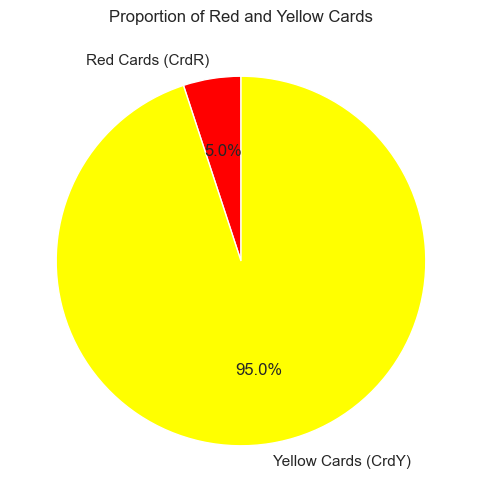

In [68]:

cards = df[['Red Cards (CrdR)', 'Yellow Cards (CrdY)']].sum()
plt.figure(figsize=(8, 6))
cards.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])
plt.title('Proportion of Red and Yellow Cards')
plt.ylabel('')  # Hide y-axis label
plt.show()

## Plot 8: **Density Plot of Expected Goals (xG) vs. Non-Penalty xG**

#### This density plot provides a visual comparison of the distribution of expected goals (xG) and non-penalty expected goals (npxG) across players. Each curve represents the probability density function of the respective metrics, allowing us to see how goals are anticipated based on player performance. The filled areas under the curves indicate the density of instances for each metric, with the x-axis representing the values of xG and npxG. 

#### By analyzing this plot, we can observe how the distributions overlap or differ, which helps to understand the impact of penalty goals on overall expected goals. This visualization is essential for assessing player performance in terms of scoring potential, as it allows for a nuanced view of scoring opportunities created in various scenarios, informing strategies for both players and coaching staff in optimizing goal-scoring capabilities.

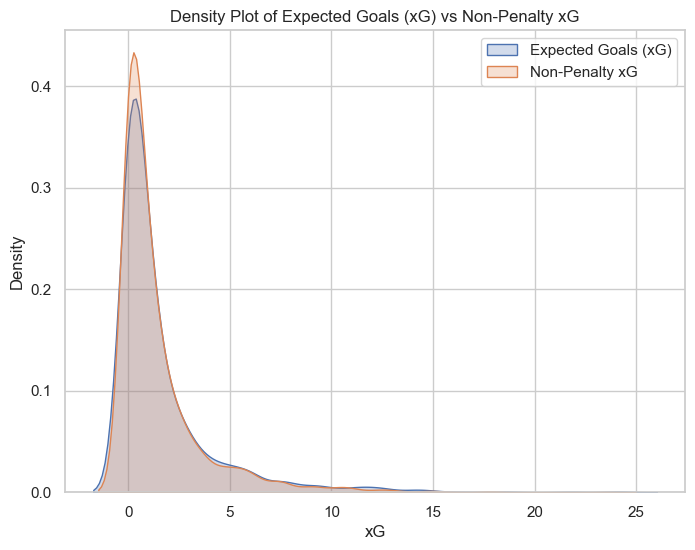

In [69]:
# 9. Density Plot - Expected Goals (xG) vs Non-Penalty xG (npxG)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Expected Goals (xG)'], label='Expected Goals (xG)', fill=True)
sns.kdeplot(df['Non-Penalty xG (npxG)'], label='Non-Penalty xG', fill=True)
plt.title('Density Plot of Expected Goals (xG) vs Non-Penalty xG')
plt.xlabel('xG')
plt.legend()
plt.show()


## Plot 9: **Top 10 Players by Contribution to Team Goals (%)**

#### This bar plot highlights the top 10 players based on their contributions to their respective teams' total goals, expressed as a percentage. Each bar represents a player's goal contribution, showcasing how significant their scoring efforts have been in relation to their team's overall performance. The x-axis indicates the percentage of goals contributed, while the y-axis lists the players alongside their respective teams. 

#### By visualizing this data, we can identify which players are pivotal to their teams' success, emphasizing their scoring impact relative to their teammates. This analysis not only celebrates individual achievement but also highlights the interconnected nature of team dynamics in football, as a player’s contributions can be crucial in determining the success of their team over a season.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\3675612460.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




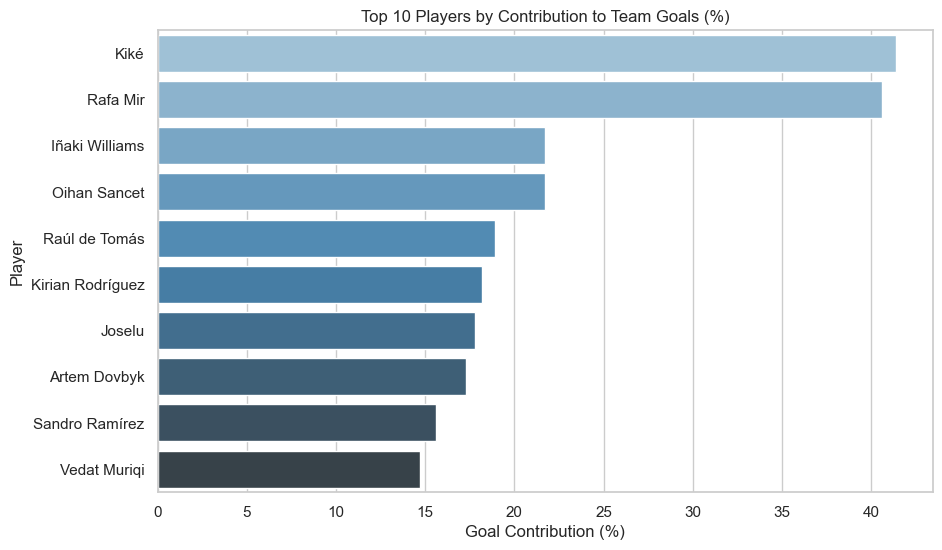

In [70]:
# Calculate team's total goals per season
team_goals = df.groupby('Team')['Goals (Gls)'].sum()

# Calculate each player's contribution to the team's goals
df['Goal Contribution'] = df.apply(lambda row: row['Goals (Gls)'] / team_goals[row['Team']] * 100, axis=1)

# Top 10 players with highest goal contribution
top_10_contributors = df.nlargest(10, 'Goal Contribution')[['Player', 'Team', 'Goal Contribution']]

# Bar Plot of Top 10 Player Contributions
plt.figure(figsize=(10, 6))
sns.barplot(x='Goal Contribution', y='Player', data=top_10_contributors, palette='Blues_d')
plt.title('Top 10 Players by Contribution to Team Goals (%)')
plt.xlabel('Goal Contribution (%)')
plt.ylabel('Player')
plt.show()


## Plot 10: Performance of [Player Name]
#### This radar chart provides a comprehensive overview of [Player Name]'s performance across several key metrics: goals scored (Gls), assists (Ast), progressive carries (PrgC), progressive passes (PrgP), and expected goals (xG). Each axis represents one of these performance metrics, allowing for a clear comparison of the player's strengths in various aspects of the game.

#### The filled area illustrates the extent of [Player Name]'s contributions in each category, highlighting their overall effectiveness on the field. This visualization not only emphasizes their goal-scoring capabilities but also showcases their playmaking abilities through assists and progressive plays. By representing multiple performance metrics in a single chart, this radar plot effectively captures the multifaceted nature of a player's impact in football, making it easier to appreciate [Player Name]'s exceptional talent and contributions to the game.

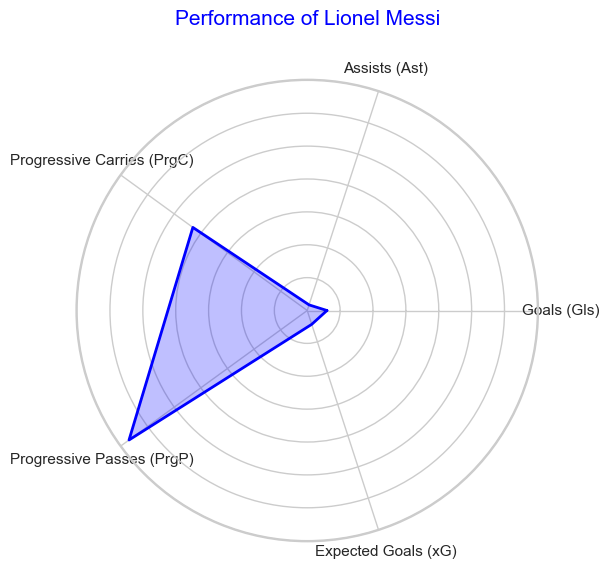

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define the radar chart function
def radar_chart(player_stats, metrics, player_name):
    # Number of variables we're plotting
    num_vars = len(metrics)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Complete the loop
    angles += angles[:1]
    
    # Set up the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Plot data and fill the area
    player_stats += player_stats[:1]  # Add the first value to complete the loop
    ax.fill(angles, player_stats, color='blue', alpha=0.25)
    ax.plot(angles, player_stats, color='blue', linewidth=2)
    
    # Labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    plt.title(f'Performance of {player_name}', size=15, color='blue', y=1.1)
    plt.show()

# Example metrics for radar chart
metrics = ['Goals (Gls)', 'Assists (Ast)', 'Progressive Carries (PrgC)', 'Progressive Passes (PrgP)', 'Expected Goals (xG)']
player_name = 'Lionel Messi'  # Replace with the player's name you're interested in
player_stats = df[df['Player'] == "Lionel Messi"][metrics].mean()

# Plot radar chart
radar_chart(player_stats.tolist(), metrics, player_name)

## Plot 11: Total Matches Played per Team by Season
#### This streamgraph visualizes the total number of matches played by each team over multiple seasons. Each colored area represents a different team, showcasing how their match participation fluctuates over the years. The x-axis indicates the seasons, while the y-axis displays the total matches played, providing a clear view of each team's engagement in the league.

#### By utilizing this area chart, we can easily observe trends in match participation for various teams, identifying which teams consistently play more matches and how their performance

In [72]:
import pandas as pd
import plotly.express as px

# Prepare data for streamgraph
stream_data = df.groupby(['Season', 'Team'])['Matches Played (MP)'].sum().reset_index()
fig = px.area(stream_data, x='Season', y='Matches Played (MP)', color='Team',
              title='Total Matches Played per Team by Season', line_group='Team')
fig.show()
